# Making Walker Stars

Prepping for computation experiments


## Setup Imports

(not relevant to repo, can skip) 

Adding module path to run correctly in examples folder

In [2]:
import sys
import os


# Add the path to the folder containing the module
module_path = os.path.abspath(os.path.join('../..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/gracekim/Documents/School_Everything_and_LEARNING/Stanford/Githubs/loc-gsopt/src


## Imports & Downloading latest Earth Orientation Data

In [6]:
from common.sat_gen import make_tle
from common.station_gen import teleport_json
from common.utils import load_earth_data, compute_all_gaps_contacts

# Brahe Imports
import brahe as bh
import brahe.data_models as bdm
import brahe.access.access as ba
import numpy as np 
%matplotlib inline

import matplotlib.pyplot as plt

# Setup info
load_earth_data('data/iau2000A_finals_ab.txt')

Loading the latest Earth Orientation Data


## Walker Constellation

In [14]:
def make_walker_constellation(
    epoch=bh.Epoch(2024, 5, 20, 0, 0, 0),
    altitude_km=550,
    eccentricity=0.001,
    inclination=90,
    num_planes=6,
    sats_per_plane=4,
    phase=1,
    argp=0.0,
    norad_start=10000,
    star = True,
):
    """
    Generate a Walker-Delta constellation and return a list of Spacecraft objects.
    """
    total_sats = num_planes * sats_per_plane
    plane_spacing = 180 if star else 360  # Key difference between Star/Delta
    constellation = []

    for p in range(num_planes):
        raan = (plane_spacing * p / num_planes)
        for s in range(sats_per_plane):
            mean_anomaly = (360/sats_per_plane) * ((s + phase*p) % sats_per_plane)
            # mean_anomaly = (360.0 * s / sats_per_plane + p * walker_delta * 360.0 / total_sats) % 360.0
            norad_id = norad_start + p * sats_per_plane + s
            
            # Create TLE using your make_tle function
            tle = make_tle(
                epc0=epoch,
                alt=altitude_km,
                ecc=eccentricity,
                inc=inclination,
                raan=raan,
                argp=argp,
                M=mean_anomaly,
                norad_id=norad_id
            )

            sat_name = f"Sat_{p}_{s}"
            sat_obj = bdm.Spacecraft(
                id=norad_id,
                name=sat_name,
                line1=tle.line1,
                line2=tle.line2,
            )
            constellation.append(sat_obj)

    return constellation

In [ ]:
# delta testing out for galieo

make_walker_constellation(
    epoch=bh.Epoch(2024, 5, 20, 0, 0, 0),
    altitude_km=23222,        # MEO altitude (~23,222 km for Galileo)
    eccentricity=0.0,         # Near-circular orbit (Walker standard)
    inclination=56.0,         # Mid-latitude inclination (not polar)
    num_planes=3,             # 3 planes for 360° coverage
    sats_per_plane=8,         # 24 total satellites (3×8)
    phase=1,                  # Phasing parameter F=1 (Galileo uses 1)
    argp=0.0,                 # Standard for circular orbits
    norad_start=10000,
    star=False                # Critical: Disables 180° plane clustering
)


[Spacecraft(id=10000, name='Sat_0_0', line1='1 10000U          24141.00000000  .00000000  00000-0  00000-0 0    06', line2='2 10000  56.0000   0.0000 0000000   0.0000   0.0000  1.70475587    08', model=None)]

In [ ]:
# test for iridium walker star

make_walker_constellation(
    epoch=bh.Epoch(2024, 5, 20, 0, 0, 0),
    altitude_km=781,
    eccentricity=0.001,
    inclination=86.4,
    num_planes=6,
    sats_per_plane=11,
    phase=2,
    argp=0.0,
    norad_start=10000,
    star = True,
)

[Spacecraft(id=10000, name='Iridium_0_0', line1='1 10000U          24141.00000000  .00000000  00000-0  00000-0 0    06', line2='2 10000  86.4000   0.0000 0010000   0.0000   0.0000 14.33216553    05', model=None),
 Spacecraft(id=10001, name='Iridium_0_1', line1='1 10001U          24141.00000000  .00000000  00000-0  00000-0 0    07', line2='2 10001  86.4000   0.0000 0010000   0.0000  32.7273 14.33216553    00', model=None),
 Spacecraft(id=10002, name='Iridium_0_2', line1='1 10002U          24141.00000000  .00000000  00000-0  00000-0 0    08', line2='2 10002  86.4000   0.0000 0010000   0.0000  65.4545 14.33216553    06', model=None),
 Spacecraft(id=10003, name='Iridium_0_3', line1='1 10003U          24141.00000000  .00000000  00000-0  00000-0 0    09', line2='2 10003  86.4000   0.0000 0010000   0.0000  98.1818 14.33216553    03', model=None),
 Spacecraft(id=10004, name='Iridium_0_4', line1='1 10004U          24141.00000000  .00000000  00000-0  00000-0 0    00', line2='2 10004  86.4000   0

In [ ]:
# test for iridium walker star

make_walker_constellation(
    epoch=bh.Epoch(2024, 5, 20, 0, 0, 0),
    altitude_km=781,
    eccentricity=0.001,
    inclination=86.4,
    num_planes= 2, #6,
    sats_per_plane= 1,#11,
    phase=2,
    argp=0.0,
    norad_start=10000,
    star = True,
)

[Spacecraft(id=10000, name='Sat_0_0', line1='1 10000U          24141.00000000  .00000000  00000-0  00000-0 0    06', line2='2 10000  86.4000   0.0000 0010000   0.0000   0.0000 14.33216553    05', model=None),
 Spacecraft(id=10001, name='Sat_1_0', line1='1 10001U          24141.00000000  .00000000  00000-0  00000-0 0    07', line2='2 10001  86.4000  90.0000 0010000   0.0000   0.0000 14.33216553    05', model=None)]

In [18]:
##### Trying to generate a satellite just through tles ######

# Create a TLE
epc0 = bh.Epoch(2024, 5, 20, 0, 0, 0) # This is the epoch of the orbital elements
alt  = 550 # Altitude in km
ecc  = 0.01 # Eccentricity - Generally don't want it to be 0, so give it a small value 0.0001 to 0.01
inc  = 53 # Inclination in degrees
raan = 15 # Right Ascension of the Ascending Node in degrees
argp = 30 # Argument of Perigee in degrees
M    = 45 # Mean Anomaly in degrees
norad_id = 99999 # NORAD ID of the satellite - This is just a placeholder, but we need a number.

tle = make_tle(epc0, alt, ecc, inc, raan, argp, M, norad_id=norad_id)

print(f'Our TLE looks like:\n {tle.line1}\n {tle.line2}\n')

sat1 = bdm.Spacecraft(
    id=99999, # Might need to change this at one point
    name="Sat1",
    line1=tle.line1,
    line2=tle.line2,
)

Our TLE looks like:
 1 99999U          24141.00000000  .00000000  00000-0  00000-0 0    00
 2 99999  53.0000  15.0000 0100000  30.0000  45.0000 15.05490874    07



## Load Ground Station Locations and Compute Contacts

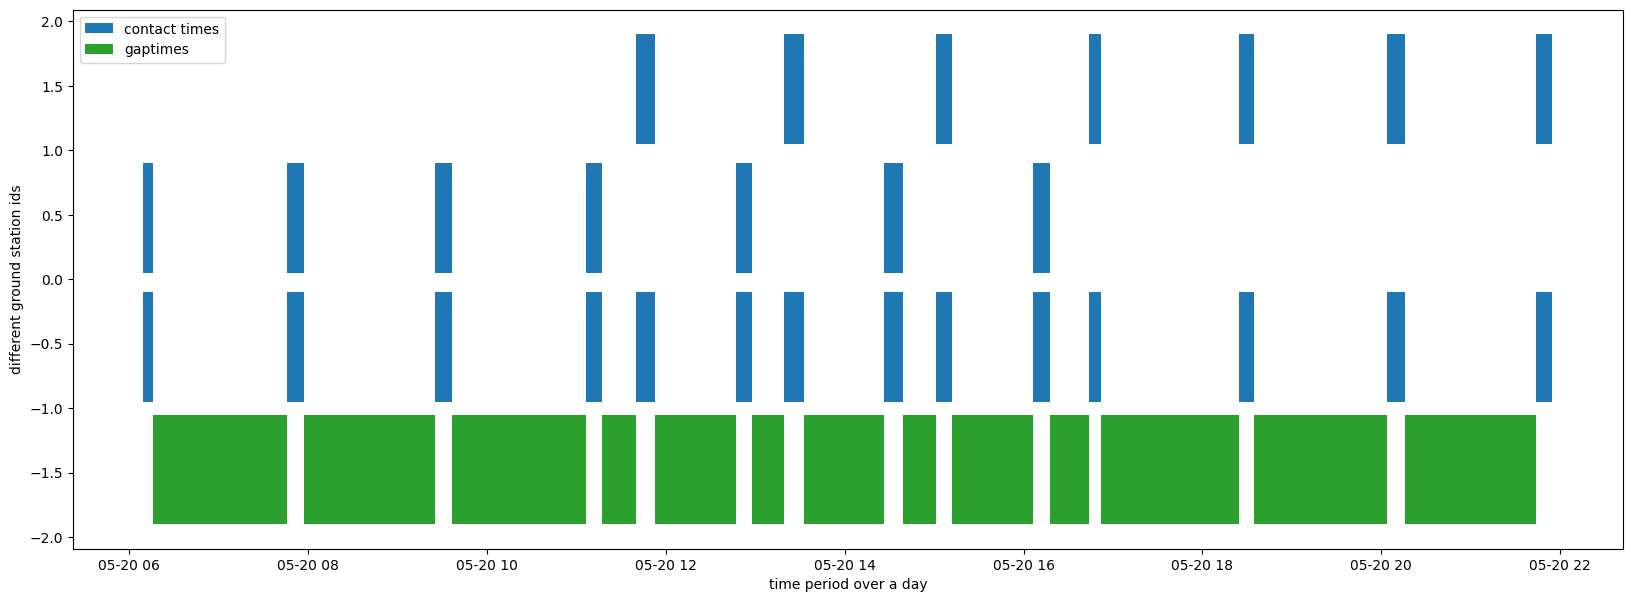

In [ ]:
fig, ax = fig, ax =  plt.subplots(figsize=(20,7))

# Ground station Locations
stations = teleport_json('data/teleport_locations.json')

# Computing Contacts for only one day
epc1 = epc0 + 86400 # seconds in a day

contacts_all = []

######################## Plotting specific! ####################

# going through computing contacts for all stations and all 
for station,id in zip(stations[0:2],range(len(stations[0:2]))):
    contacts = ba.find_location_accesses(sat1,station,epc0,epc1)
    for contact in contacts:
        contacts_all.append(contact)
    ax.broken_barh([(contacts[i].t_start,contacts[i].t_end-contacts[i].t_start) for i in range(len(contacts))], (id+0.05, 0.85),facecolors='tab:blue')

ax.broken_barh([(contacts_all[i].t_start,contacts_all[i].t_end-contacts_all[i].t_start) for i in range(len(contacts_all))], (-0.95, 0.85),facecolors='tab:blue', label = "contact times")

sorted_contacts = sorted(contacts_all, key=lambda t: t.t_start)
all_gap_times = []

current_t_end = sorted_contacts[0].t_end
for contact in sorted_contacts:
    if current_t_end < contact.t_end and current_t_end > contact.t_start:
        current_t_end = contact.t_end
    if current_t_end < contact.t_start:
        all_gap_times.append((current_t_end,contact.t_start))
        current_t_end = contact.t_end

ax.broken_barh([(all_gap_times[i][0],all_gap_times[i][1]-all_gap_times[i][0]) for i in range(len(all_gap_times))], (-1.9, 0.85),facecolors='tab:green',label = "gaptimes")

plt.ylabel("different ground station ids")
plt.xlabel("time period over a day")
plt.legend()
plt.show()

######################## Plotting specific! ####################

